<a href="https://colab.research.google.com/github/shahid9455/iCodeGuru/blob/main/SMS_Spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
#!pip install tensorflow

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

In [21]:
data = pd.read_csv('spam.csv', encoding='latin-1')

In [22]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [23]:
data = data[['v1', 'v2']]
data.columns = ['label', 'message']

In [24]:
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

<ipython-input-24-55d4b3c39d0a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = data['label'].map({'ham': 0, 'spam': 1})


In [25]:
data.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    data['message'],
    data['label'],
    test_size=0.2, random_state=42

)

In [27]:
len(X_train), len(X_test)

(4457, 1115)

In [28]:
Tfidf = TfidfVectorizer(stop_words='english')

In [29]:
X_train_tfidf = Tfidf.fit_transform(X_train)
X_test_tfidf = Tfidf.transform(X_test)

In [30]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_tfidf.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = 'adam',loss = 'binary_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
history = model.fit(X_train_tfidf, y_train, epochs=10, batch_size=32, validation_data=(X_test_tfidf, y_test),callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8441 - loss: 0.5450 - val_accuracy: 0.8655 - val_loss: 0.2106
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9056 - loss: 0.1758 - val_accuracy: 0.9776 - val_loss: 0.0852
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9877 - loss: 0.0517 - val_accuracy: 0.9812 - val_loss: 0.0729
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9960 - loss: 0.0241 - val_accuracy: 0.9812 - val_loss: 0.0785
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9975 - loss: 0.0122 - val_accuracy: 0.9812 - val_loss: 0.0845
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9990 - loss: 0.0086 - val_accuracy: 0.9812 - val_loss: 0.0902


In [32]:
loss, accuracy = model.evaluate(X_test_tfidf, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9858 - loss: 0.0614
Test Loss: 0.0902
Test Accuracy: 0.9812


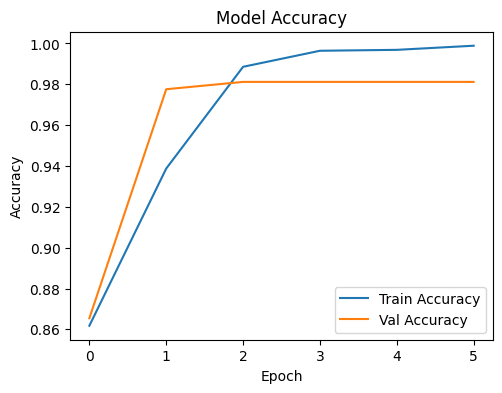

In [34]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

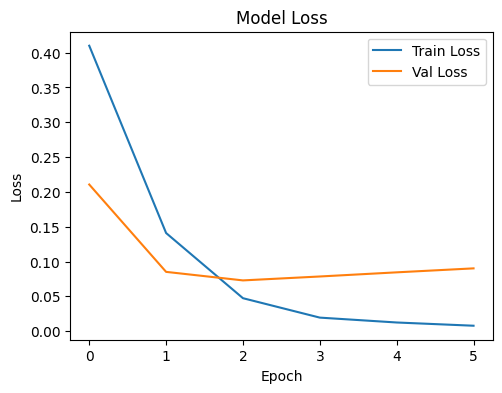

In [35]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [36]:
def predict_spam(message):
    message_tfidf = Tfidf.transform([message])
    prediction = model.predict(message_tfidf)[0][0]
    if prediction >= 0.5:
        return 'Spam'
    else:
        return 'Not Spam'

In [41]:
user_input = input("Enter a message: ")
result = predict_spam(user_input)
print(f"Prediction: {result}")

Enter a message: Want to win data? Text YES to 92100 and stand a chance to get up to 3GB per day (Rs.0.315/day with VAT included, auto-renewable)! Text YES to 92100!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Prediction: Not Spam


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   int64 
 1   message  5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [43]:
model.save('spam_detection_model.h5')

In [44]:
from tensorflow.keras.models import load_model

loaded_model = load_model('spam_detection_model.h5')